In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 1000)
parkingdata.size

13000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2303216,Regency,Lt LONSDALE STREET,EXHIBITION STREET,SPRING STREET,3,3310N,03/12/2011 11:49:07 AM,03/12/2011 11:56:54 AM,467,2P MTR M-SAT 7:30-20:30,0,926,1652
10842673,Southbank,COVENTRY STREET,WELLS STREET,ST KILDA ROAD,4,9287S,20/08/2012 11:59:26 AM,20/08/2012 12:02:40 PM,194,2P TKT A M-F 7:30-18:30,0,547,5794
9585843,Supreme,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,3,2988N,13/07/2012 08:48:00 AM,13/07/2012 08:49:38 AM,98,1P MTR M-F 7:30-16:00,0,894,5339
220404,Regency,RUSSELL STREET,Lt LONSDALE STREET,LONSDALE STREET,1,C842,07/10/2011 02:16:21 PM,07/10/2011 03:42:51 PM,5190,2P MTR M-SAT 7:30-20:30,0,1221,426
10467359,Jolimont,PARLIAMENT PLACE,GISBORNE STREET,ST ANDREWS PLACE,5,11791W,08/08/2012 05:25:50 PM,08/08/2012 06:30:00 PM,3850,2P MTR M-SAT 7:30-18:30,0,1090,6588


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9229850,Princes Theatre,SPRING STREET,Lt BOURKE STREET,BOURKE STREET,5,55W,02/07/2012 06:46:23 PM,02/07/2012 08:30:00 PM,6217,2P MTR M-SAT 7:30-20:30,0,1288,34
12207286,City Square,FLINDERS LANE,SWANSTON STREET,RUSSELL STREET,4,1767S,30/09/2012 05:54:01 PM,30/09/2012 06:02:07 PM,486,P10 M-SUN 0:00-23:59,0,669,7692
2604708,Banks,FLINDERS LANE,QUEEN STREET,ELIZABETH STREET,4,1789S,12/12/2011 10:00:12 AM,12/12/2011 10:23:41 AM,1409,1/2P MTR M-SAT 7:30-19:30,0,669,1377
9980793,RACV,Lt COLLINS STREET,QUEEN STREET,ELIZABETH STREET,4,2221S,25/07/2012 10:23:34 AM,25/07/2012 10:33:44 AM,610,P10 M-F 7:30-19:30,0,911,1043
2999002,Regency,Lt LONSDALE STREET,EXHIBITION STREET,SPRING STREET,4,3339S,22/12/2011 12:29:37 PM,22/12/2011 12:30:55 PM,78,2P MTR M-SAT 7:30-20:30,0,926,1586


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        101
Princes Theatre     70
Hyatt               69
The Mac             69
Regency             63
Titles              58
Southbank           56
Victoria Market     54
County              52
Magistrates         47
Banks               44
Courtney            43
Rialto              41
Chinatown           40
Hardware            40
City Square         37
RACV                33
Spencer             27
Jolimont            27
Supreme             20
Docklands            4
Tavistock            3
West Melbourne       2
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2303216,REGENCY,LT LONSDALE STREET,EXHIBITION STREET,SPRING STREET,3,3310N,03/12/2011 11:49:07 AM,03/12/2011 11:56:54 AM,467,2P MTR M-SAT 7:30-20:30,0,926,1652
10842673,SOUTHBANK,COVENTRY STREET,WELLS STREET,ST KILDA ROAD,4,9287S,20/08/2012 11:59:26 AM,20/08/2012 12:02:40 PM,194,2P TKT A M-F 7:30-18:30,0,547,5794
9585843,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,3,2988N,13/07/2012 08:48:00 AM,13/07/2012 08:49:38 AM,98,1P MTR M-F 7:30-16:00,0,894,5339
220404,REGENCY,RUSSELL STREET,LT LONSDALE STREET,LONSDALE STREET,1,C842,07/10/2011 02:16:21 PM,07/10/2011 03:42:51 PM,5190,2P MTR M-SAT 7:30-20:30,0,1221,426
10467359,JOLIMONT,PARLIAMENT PLACE,GISBORNE STREET,ST ANDREWS PLACE,5,11791W,08/08/2012 05:25:50 PM,08/08/2012 06:30:00 PM,3850,2P MTR M-SAT 7:30-18:30,0,1090,6588


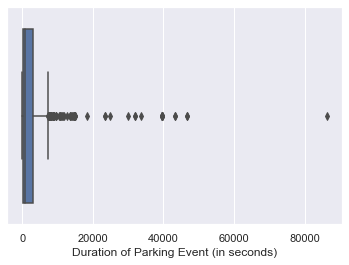

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET        101
QUEEN STREET            70
LA TROBE STREET         61
EXHIBITION STREET       59
COLLINS STREET          56
BOURKE STREET           52
FRANKLIN STREET         48
ELIZABETH STREET        46
RUSSELL STREET          44
LT LONSDALE STREET      34
WILLIAM STREET          29
SPRING STREET           29
FLINDERS LANE           28
ERROL STREET            19
A'BECKETT STREET        19
LT COLLINS STREET       19
SPENCER STREET          17
COVENTRY STREET         17
KING STREET             17
VICTORIA STREET         16
LT BOURKE STREET        15
CAPEL STREET            15
FLINDERS STREET         14
COBDEN STREET           12
QUEENSBERRY STREET      12
GRANT STREET            11
ALBERT STREET           11
O'CONNELL STREET        10
SWANSTON STREET          8
KAVANAGH STREET          7
THERRY STREET            7
CHETWYND STREET          6
DORCAS STREET            6
ROSSLYN STREET           6
WILLS STREET             5
MARKET STREET            5
CLARENDON STREET         5
P

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            109
QUEEN STREET            79
WILLIAM STREET          57
QUEENSBERRY STREET      57
RUSSELL STREET          55
SWANSTON STREET         51
EXHIBITION STREET       46
VICTORIA STREET         42
SPENCER STREET          41
LONSDALE STREET         40
LT LONSDALE STREET      37
LT COLLINS STREET       34
LT BOURKE STREET        29
BOURKE STREET           28
COLLINS STREET          23
ELIZABETH STREET        22
FLINDERS LANE           21
LA TROBE STREET         19
A'BECKETT STREET        19
FRANKLIN STREET         15
WELLS STREET            14
WILLAM STREET           13
O'CONNELL STREET        13
DODDS STREET            10
FLINDERS STREET         10
CHETWYND STREET          8
THERRY STREET            8
ERROL STREET             8
STURT STREET             7
PEEL STREET              7
SOUTHBANK BOULEVARD      7
KINGS WAY                6
COBDEN STREET            6
VICTORIA PARADE          5
LANSDOWNE STREET         5
HOWARD STREET            5
BALSTON STREET           5
G

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET        104
VICTORIA STREET        83
ELIZABETH STREET       82
QUEEN STREET           70
EXHIBITION STREET      56
SPRING STREET          47
KING STREET            41
LONSDALE STREET        40
LT BOURKE STREET       40
RUSSELL STREET         37
LA TROBE STREET        34
COLLINS STREET         34
FLINDERS LANE          33
BOURKE STREET          29
LT COLLINS STREET      28
SWANSTON STREET        22
LT LONSDALE STREET     21
FLINDERS STREET        21
ST KILDA ROAD          14
DODDS STREET           13
LANSDOWNE STREET       10
WALSH STREET           10
QUEENSBERRY STREET      9
HOWARD STREET           8
THERRY STREET           8
LEVESON STREET          8
FRANKLIN STREET         8
A'BECKETT STREET        7
HAWKE STREET            7
STURT STREET            6
POWER STREET            6
WELLS STREET            6
CAPEL STREET            5
EADES STREET            5
SPENCER STREET          4
DUDLEY STREET           4
STANLEY STREET          4
ELM STREET              4
GRANT STREET

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2303216,REGENCY,LT LONSDALE STREET,EXHIBITION STREET,SPRING STREET,3,3310N,2011-03-12 11:49:07,2011-03-12 11:56:54,467,2P MTR M-SAT 7:30-20:30,0,926,1652
10842673,SOUTHBANK,COVENTRY STREET,WELLS STREET,ST KILDA ROAD,4,9287S,2012-08-20 11:59:26,2012-08-20 12:02:40,194,2P TKT A M-F 7:30-18:30,0,547,5794
9585843,SUPREME,LONSDALE STREET,WILLIAM STREET,QUEEN STREET,3,2988N,2012-07-13 08:48:00,2012-07-13 08:49:38,98,1P MTR M-F 7:30-16:00,0,894,5339
220404,REGENCY,RUSSELL STREET,LT LONSDALE STREET,LONSDALE STREET,1,C842,2011-07-10 14:16:21,2011-07-10 15:42:51,5190,2P MTR M-SAT 7:30-20:30,0,1221,426
10467359,JOLIMONT,PARLIAMENT PLACE,GISBORNE STREET,ST ANDREWS PLACE,5,11791W,2012-08-08 17:25:50,2012-08-08 18:30:00,3850,2P MTR M-SAT 7:30-18:30,0,1090,6588


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
9229850,PRINCES THEATRE,SPRING STREET,LT BOURKE STREET,BOURKE STREET,5,55W,2012-02-07 18:46:23,2012-02-07 20:30:00,6217,2P MTR M-SAT 7:30-20:30,0,1288,34
12207286,CITY SQUARE,FLINDERS LANE,SWANSTON STREET,RUSSELL STREET,4,1767S,2012-09-30 17:54:01,2012-09-30 18:02:07,486,P10 M-SUN 0:00-23:59,0,669,7692
2604708,BANKS,FLINDERS LANE,QUEEN STREET,ELIZABETH STREET,4,1789S,2011-12-12 10:00:12,2011-12-12 10:23:41,1409,1/2P MTR M-SAT 7:30-19:30,0,669,1377
9980793,RACV,LT COLLINS STREET,QUEEN STREET,ELIZABETH STREET,4,2221S,2012-07-25 10:23:34,2012-07-25 10:33:44,610,P10 M-F 7:30-19:30,0,911,1043
2999002,REGENCY,LT LONSDALE STREET,EXHIBITION STREET,SPRING STREET,4,3339S,2011-12-22 12:29:37,2011-12-22 12:30:55,78,2P MTR M-SAT 7:30-20:30,0,926,1586


### KNN Classification Model on Predicitive Analytics question 1

In [19]:
#Target field identification
target = parkingdata['In Violation?']
target.head(10)

2303216     0
10842673    0
9585843     0
220404      0
10467359    0
11645544    0
5038717     0
433462      0
1183371     0
1992728     0
Name: In Violation?, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('In Violation?', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
2303216,0,0,0,0,0,3,467,926,1652,11,11
10842673,1,1,1,1,1,4,194,547,5794,11,12
9585843,2,2,2,2,2,3,98,894,5339,8,8
220404,0,3,3,3,0,1,5190,1221,426,14,15
10467359,3,4,4,4,3,5,3850,1090,6588,17,18
11645544,4,5,2,2,4,3,96,856,5719,12,12
5038717,0,6,5,3,4,2,1982,1288,66,12,13
433462,5,7,0,0,5,4,842,670,1208,14,15
1183371,6,8,6,5,6,5,1368,627,3263,11,11
1992728,7,9,7,6,7,1,272,1171,610,7,7


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 2936 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 3434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  1.0min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 8,
 'p': 1,
 'weights': 'distance'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a = bestModel.best_estimator_.get_params()['algorithm']
best_l = bestModel.best_estimator_.get_params()['leaf_size']
best_p = bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 8
Best weights: distance
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.882
1,auto,10,1,1,distance,0.882
2,auto,10,1,2,uniform,0.882
3,auto,10,1,2,distance,0.882
4,auto,10,1,5,uniform,0.877
5,auto,10,1,5,distance,0.877
6,auto,10,2,1,uniform,0.904
7,auto,10,2,1,distance,0.883
8,auto,10,2,2,uniform,0.901
9,auto,10,2,2,distance,0.882


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.85
Score with 2 selected features: 0.85
Score with 3 selected features: 0.85
Score with 4 selected features: 0.885
Score with 5 selected features: 0.885
Score with 6 selected features: 0.905
Score with 7 selected features: 0.905
Score with 8 selected features: 0.905

Indexs of the desired features
[2, 3, 4, 6, 0, 7, 10, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Between Street 2,Sign,Duration of Parking Event (in seconds),Area Name,Street ID,Departure Hour,Side Of Street
2303216,0,0,0,467,0,926,11,3
10842673,1,1,1,194,1,547,12,4
9585843,2,2,2,98,2,894,8,3
220404,3,3,0,5190,0,1221,15,1
10467359,4,4,3,3850,3,1090,18,5
11645544,2,2,4,96,4,856,12,3
5038717,5,3,4,1982,0,1288,13,2
433462,0,0,5,842,5,670,15,4
1183371,6,5,6,1368,6,627,11,5
1992728,7,6,7,272,7,1171,7,1


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 2816 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 3266 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:   52.5s finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'uniform'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 6
Best weights: uniform
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.881
1,auto,10,1,1,distance,0.881
2,auto,10,1,2,uniform,0.879
3,auto,10,1,2,distance,0.879
4,auto,10,1,5,uniform,0.883
5,auto,10,1,5,distance,0.883
6,auto,10,2,1,uniform,0.892
7,auto,10,2,1,distance,0.881
8,auto,10,2,2,uniform,0.901
9,auto,10,2,2,distance,0.879


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[415   9]
 [ 45  31]]

[Train/test split] score: 0.89200


In [36]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.88000
[fold 1] score: 0.90000
[fold 2] score: 0.88500
[fold 3] score: 0.93000
[fold 4] score: 0.91000

KNN mean score [5 folds] = 0.901
